In [57]:
!pip install numpy matplotlib control

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from control.matlab import *

In [2]:
def plotBodeBuild(w):
    plt.figure()
    bode(w)
    plt.savefig('img/Bode.png', format='png', dpi=800)
    plt.close()

In [6]:
def create_hurwitz_matrix(coefficients):
    k = 0
    matrix = []
    for _ in range(0, len(coefficients)-1):
        column = []
        for d in range(0, len(coefficients)-1):
            if 2*d+1-k < 0:
                column.append(0)
            else:
                try:
                    column.append(coefficients[2*d+1-k])
                except IndexError:
                    column.append(0)
            d += 1
        matrix.append(column)
        k += 1
    return np.array(matrix)

In [8]:
def plotNyqustBuild(num, den, tau):
    w = tf(num, den)
    print(f'Передаточная функция САУ : \n {w}')
    m = create_hurwitz_matrix(den)
    print(m)
    for i in range(1, (len(m) + 1)):
        print(f'Определитель {i}: {np.round(np.linalg.det(m[0:i:1,0:i]), 2)}')
    t = np.arange(0.0, tau, 0.1)
    y_step, x_step = step(w, T=tau)
    plt.figure()
    nyquist(w)
    plt.savefig('img/Nyquist.png', format='png', dpi=800)
    plt.close()
    plt.figure()
    plt.plot(x_step, y_step, color='red', linewidth=0.85)
    plt.axhline(1.0, color='black', linestyle='--', linewidth=0.7)
    plt.grid()
    plt.ylabel('Amplitude')
    plt.xlabel('Time, (sec)')
    plt.title('Step response')
    plt.savefig('img/Step response.png', format='png', dpi=800)
    plt.close()
    plotBodeBuild(w)

In [3]:
def plotNyqustBuildNotSave(num, den, tau):
    w = tf(num, den)
    print(f'Передаточная функция САУ : \n {w}')
    m = create_hurwitz_matrix(den)
    print(m)
    for i in range(1, (len(m) + 1)):
        print(f'Определитель {i}: {np.round(np.linalg.det(m[0:i:1,0:i]), 2)}')
    t = np.arange(0.0, tau, 0.1)
    y_step, x_step = step(w, T=tau)
    plt.figure()
    nyquist(w)
    plt.figure()
    plt.plot(x_step, y_step, color='red', linewidth=0.85)
    plt.axhline(1.0, color='black', linestyle='--', linewidth=0.7)
    plt.grid()
    plt.ylabel('Amplitude')
    plt.xlabel('Time, (sec)')
    plt.title('Step response')
    plt.figure()
    bode(w)

In [9]:
plotNyqustBuild([2.], [1, 5, 5, 3, 1], 50)

Передаточная функция САУ : 
 
              2
-----------------------------
s^4 + 5 s^3 + 5 s^2 + 3 s + 1

[[5 3 0 0]
 [1 5 1 0]
 [0 5 3 0]
 [0 1 5 1]]
Определитель 1: 5.0
Определитель 2: 22.0
Определитель 3: 41.0
Определитель 4: 41.0


Передаточная функция САУ : 
 
              2
-----------------------------
s^4 + 5 s^3 + 5 s^2 + 3 s + 1

[[5 3 0 0]
 [1 5 1 0]
 [0 5 3 0]
 [0 1 5 1]]
Определитель 1: 5.0
Определитель 2: 22.0
Определитель 3: 41.0
Определитель 4: 41.0


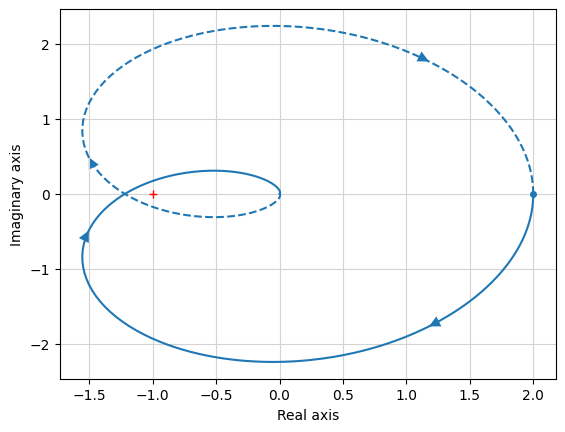

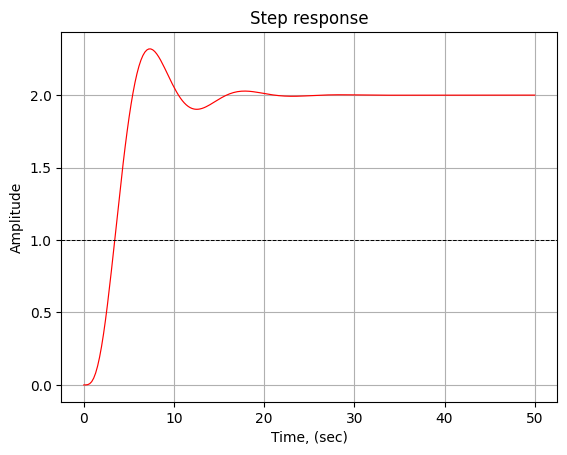

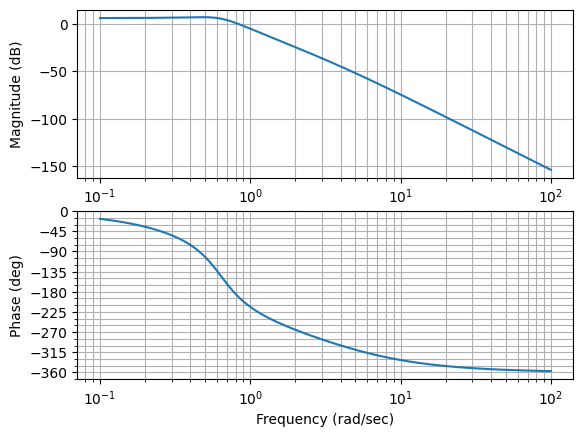

In [7]:
plotNyqustBuildNotSave([2.], [1, 5, 5, 3, 1], 50)